# Assignment 1: Visualize the map and bird locations in the nicest possible way

<div class="alert alert-success">
    <b>Note</b>:
     <ul>
      <li>This Notebook contains the code used the generate the final visualisations directly accessible in the Final_output folder on the Github
    </li>
    </ul>
</div>

In [155]:
#Importing the necessary librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
from scipy import misc

In [156]:
%matplotlib inline

In [157]:
%pwd

'/home/dounia/A_M2DS_/Vizu'

<div class="alert alert-success">
    <b>Step 1:</b>
     <ul>
      <li>Displaying the map 
    </li>
    </ul>
</div>

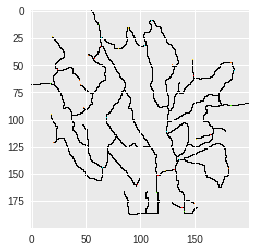

In [158]:
# We apload the image from the .bmp file provided for the challenge
path    = './'
image   = misc.imread(os.path.join(path,'map.bmp'), flatten= 0)
imgplot = plt.imshow(image)


<div class="alert alert-success">
     <ul>
      <li>We notice that the original map is quite small and is of a low quality. We will try to resize it and switch the grey background into a white one in order to have more contrast between the map lines and the background.
    </li>
    </ul>
</div>

In [159]:
#switching the background to white 

def image_process(image):
    for i in range(200):
        for j in range(200):
            for l in range(3):
                if image[i][j][l] != 0 :
                    image[i][j][l] = 255
    return image


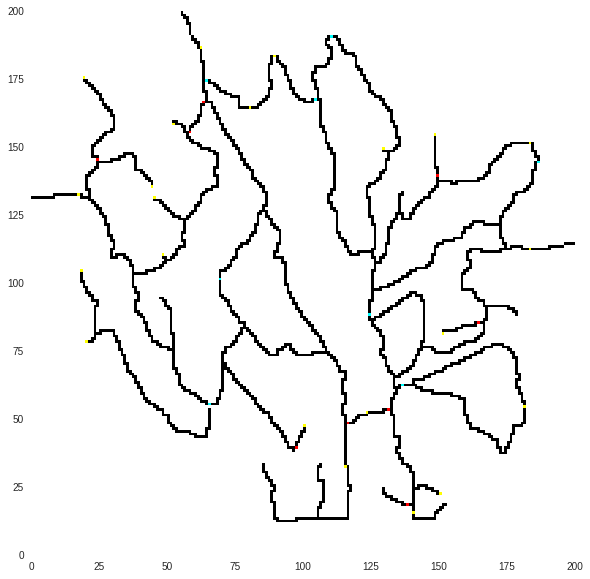

In [160]:
#Applying the transformation

image = image_process(image)

#Choose bigger figure size 

plt.figure(figsize=(20,10))
plt.grid(False)

#Displaying the new image 
imgplot = plt.imshow(image, extent= [0,200,0,200])

<div class="alert alert-success">
     <ul>
      <li>Resizing the original image resulted in a poor quality of for the outline of the map. 
We can try to use external tools to enhance the map by smoothing out the pixels and have a more even outline for the map.
    </li>
    </ul>
</div>

In [161]:
#Uploading an enhanced map to use 

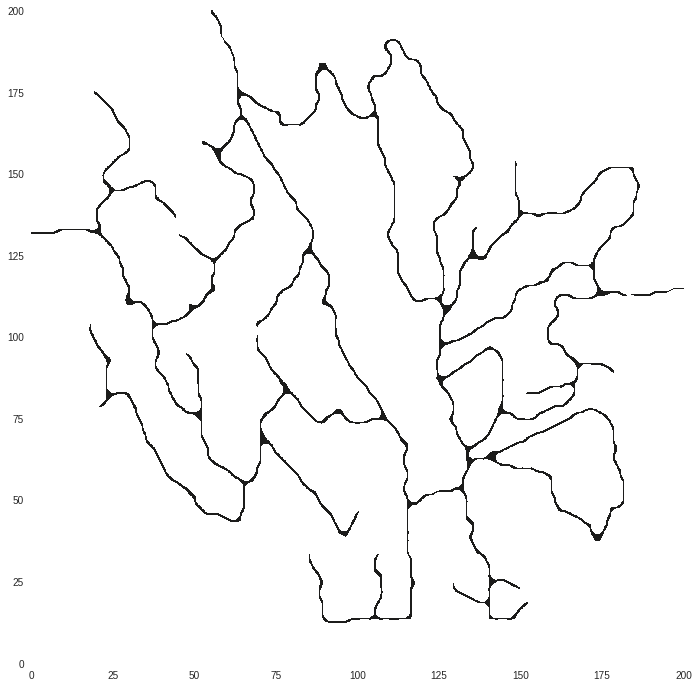

In [162]:
path    = './'
image_1   = misc.imread(os.path.join(path,'map_2.png'), flatten= 0)

plt.figure(figsize=(24,12))
plt.grid(False)

#Displaying the new image 
imgplot = plt.imshow(image_1, extent= [0,200,0,200])

<div class="alert alert-success">
     <ul>
      <li>This version of the map seems more appropriate to be used further in this notebook.
    </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>Step 2:</b>
     <ul>
      <li>Uploading the "AllBirdsv4.csv" File and displaying the data.
    </li>
    </ul>
</div>

In [163]:
#We read the Csv and define Data tables keeping only the bird name and its coordianates 
df = pd.read_csv('./AllBirdsv4.csv')
df_useful = df[['English_name','X','Y']]

In [164]:
#We add a preprocessing module to make sure all values are usable

In [165]:
def clean_int(x):
    try:
        return int(x)
    except :
        pass
    
df_useful['X']= df_useful['X'].apply(lambda x : clean_int(x))
df_useful['Y']= df_useful['Y'].apply(lambda x : clean_int(x))

/home/dounia/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dounia/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [166]:
#We draw a random sample 

df_useful.sample(10)

,English_name,X,Y
486,Canadian Cootamum,32,125
1957,Scrawny Jay,58,89
2052,Vermillion Trillian,64,77
386,Bombadil,65,148
1731,Queenscoat,70,164
1468,Purple Tooting Tout,62,49
1835,Bent-beak Riffraff,78,144
42,Rose-crested Blue Pipit,149,151
1643,Queenscoat,42,118
466,Broad-winged Jojo,44,81


In [167]:
# Number of elements in the file
df_useful.count()

English_name    2078
X               2078
Y               2078
dtype: int64

<div class="alert alert-success">
     <ul>
      <li>We notice that there are too many samples to print all of them individually on the same map. So we devised the following strategy:</li>
 
    </ul>
</div>

- We will use the 2D map as a background for our plots
- We will represent every bird species with a different color as we are dealing with different categories
- Instead of plotting every bird coordinates as a dot (or with an 'o' Marker ) on the map, we will plot clusters of birds that we will compute using a clustering algorithm. The size of the ( 'o' Marker ) representing a cluster will be proportionnate to the population of birds of that cluster. The coordinates of the cluster will be computed based on the different coordinates.

   

<div class="alert alert-success">
    <b>Step 3:</b>
     <ul>
      <li>Clustering the data points 
    </li>
    </ul>
</div>

# Clustering

In [168]:
#importing the necessary librairies 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
#Applying clustering algorithm with n clusters 

def process_cluster(df, n_clusters):
    """
    Takes a df with columns : English_name, X, Y, and n_clusters, representing the number of clusters to be used. 
    returns  : dataframe with bird type , its clusters, the cluster coordinates, and the number of birds per clusters
    """
    Empty_data = pd.DataFrame(columns= ['X', 'Y', 'cluster', 'number', 'English_name'])
    kmeans = KMeans(n_clusters= n_clusters)  #initialize the number of clusters
    output_array = []
    labels       = set(df['English_name'])  #representing the birds names 
    for label in labels : 
        df_loc   = df[df['English_name'] == label][['X','Y']]    #Takes the part of the dataframe corresponding to the bird
        X        = np.array(df_loc[['X','Y']])
        kmeans.fit(X)
        centroids                 = pd.DataFrame(kmeans.cluster_centers_, columns = ['X','Y'])
        centroids['cluster']      = np.arange(n_clusters)
        numbers                   = kmeans.predict(X)
        unique, counts            = np.unique(numbers, return_counts=True)
        occurences                = dict(zip(unique, counts))
        centroids['number']       = centroids['cluster'].apply(lambda x : occurences[x])
        centroids['English_name'] = label
        centroids = pd.DataFrame( centroids , columns= ['X', 'Y', 'cluster', 'number', 'English_name'])
        Empty_data= Empty_data.append(centroids)
        
    
    return Empty_data.reset_index().drop(['index'], axis = 1)

In [170]:
#Example of applying the clustering function :
#We cluster each bird category into 5 clusters for example

process = process_cluster( df_useful , 5 )
process.head(10)

,X,Y,cluster,number,English_name
0,122.500000,75.738636,0,88,Orange Pine Plover
1,60.080808,41.909091,1,99,Orange Pine Plover
2,53.875000,149.500000,2,8,Orange Pine Plover
3,97.583333,54.083333,3,12,Orange Pine Plover
4,54.571429,100.571429,4,7,Orange Pine Plover
5,130.687500,92.812500,0,16,Pinkfinch
6,27.428571,119.142857,1,7,Pinkfinch
7,68.730769,45.192308,2,26,Pinkfinch
8,68.200000,91.733333,3,15,Pinkfinch
9,55.666667,152.777778,4,9,Pinkfinch


In [171]:
#We map each type of bird to a color. We use 15 colors from the "Tableau 20"

def color_map(process):
    
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)  
        
    #We do the mapping 
    process['color'] = process['English_name'].copy()
    labels = list(set(process['color']))
    for k in range(len(labels)) : 
        process.loc[process['color'] == labels[k] , 'color' ] = process.loc[process['color'] == labels[k] , 'color' ].apply(lambda x : tableau20[k] )
        
        
    return process 
    

In [172]:
process= color_map(process)
process.head(10)

,X,Y,cluster,number,English_name,color
0,122.500000,75.738636,0,88,Orange Pine Plover,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,60.080808,41.909091,1,99,Orange Pine Plover,"(0.12156862745098039, 0.4666666666666667, 0.70..."
2,53.875000,149.500000,2,8,Orange Pine Plover,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3,97.583333,54.083333,3,12,Orange Pine Plover,"(0.12156862745098039, 0.4666666666666667, 0.70..."
4,54.571429,100.571429,4,7,Orange Pine Plover,"(0.12156862745098039, 0.4666666666666667, 0.70..."
5,130.687500,92.812500,0,16,Pinkfinch,"(0.6823529411764706, 0.7803921568627451, 0.909..."
6,27.428571,119.142857,1,7,Pinkfinch,"(0.6823529411764706, 0.7803921568627451, 0.909..."
7,68.730769,45.192308,2,26,Pinkfinch,"(0.6823529411764706, 0.7803921568627451, 0.909..."
8,68.200000,91.733333,3,15,Pinkfinch,"(0.6823529411764706, 0.7803921568627451, 0.909..."
9,55.666667,152.777778,4,9,Pinkfinch,"(0.6823529411764706, 0.7803921568627451, 0.909..."


<div class="alert alert-success">
     <ul>
      <li>Now we have the RGB color for each bird type. We can plot the figure for different number of clusters and choose the best representation.
    </li>
    </ul>
</div>

In [173]:
def plot_map(image , process):

    plt.figure(figsize=(24,12))

    labels = list(set(process['English_name']))
    

    for k in range(process.shape[0]) : 
        df_loc = process.iloc[k , :]
        plt.scatter(df_loc['X'], df_loc['Y'], s= df_loc['number']*10, color=df_loc['color'],alpha = 1) 
    
    for area in [16, 20, 35]:
        plt.scatter([], [], c='k', alpha=0.3, s=area*13,
                  label=str(area)  )
    plt.scatter([],[], color='white', alpha=1, s=40, label = ' \n   Type of birds')
    legend1= plt.legend(loc='best', scatterpoints=1, frameon=False, labelspacing=1, title='')

    df_loc_col = process['color'].unique()

    
    for k in range(len(labels)):
        df_loc = process.iloc[k , :]
        plt.scatter([], [], color=df_loc_col[k], alpha=1, s=80,
                   label=str(labels[k]) )
    plt.legend( loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, frameon=False, labelspacing=1, title='Number of birds')    
    
    
    plt.title('Birds distribution');


    extent= (0,200,0,200)

    imgplot = plt.imshow(image, extent= [0,200,0,200])



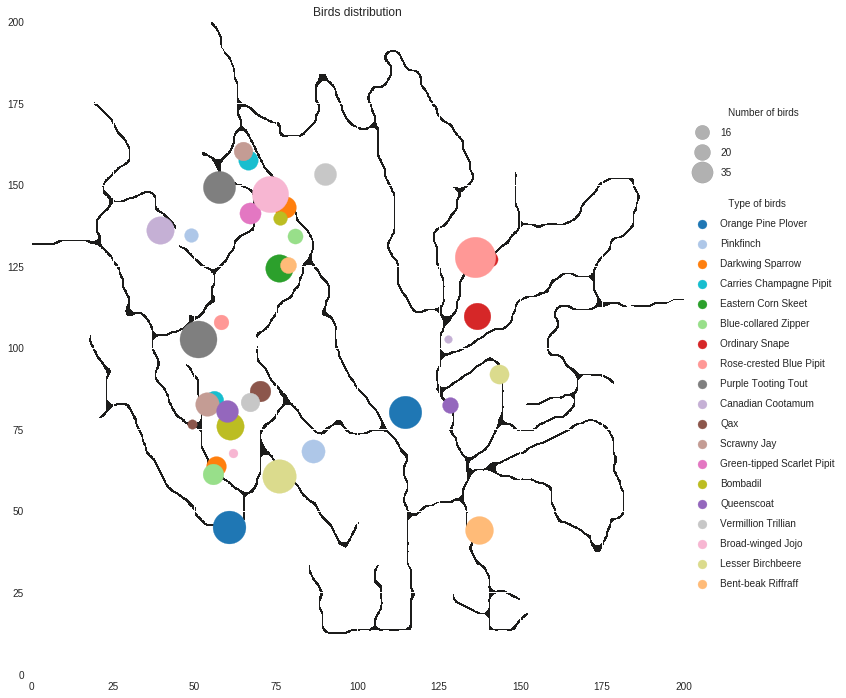

In [174]:
# let's try for different numbers of clusters 
# with n_cluster = 2 
process = color_map( process_cluster( df_useful , 2 ) )
plot_map(image_1 , process)

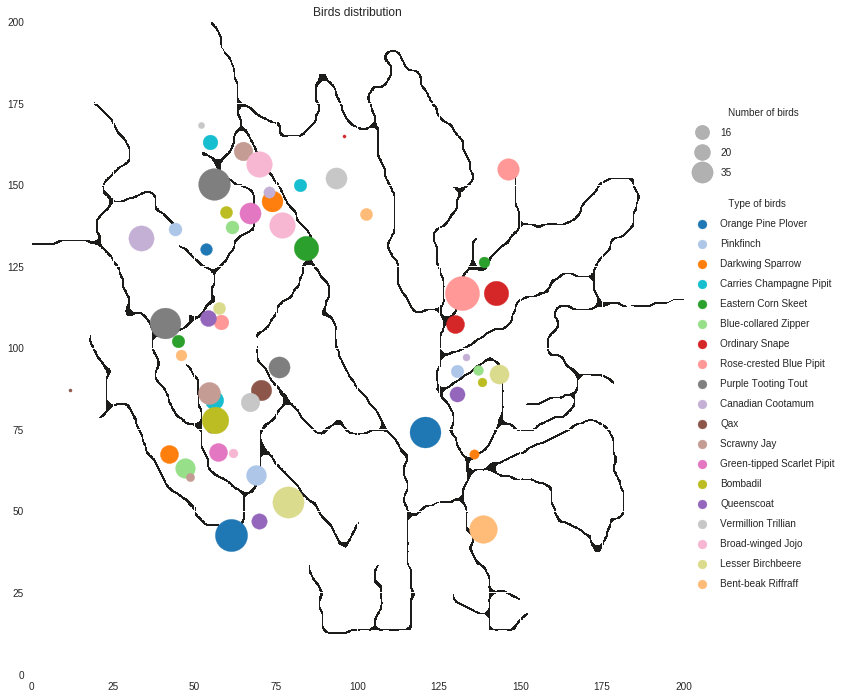

In [175]:
# let's try for different numbers of clusters 
# with n_cluster = 3 
process = color_map( process_cluster( df_useful , 3 ) )
plot_map(image_1 , process)

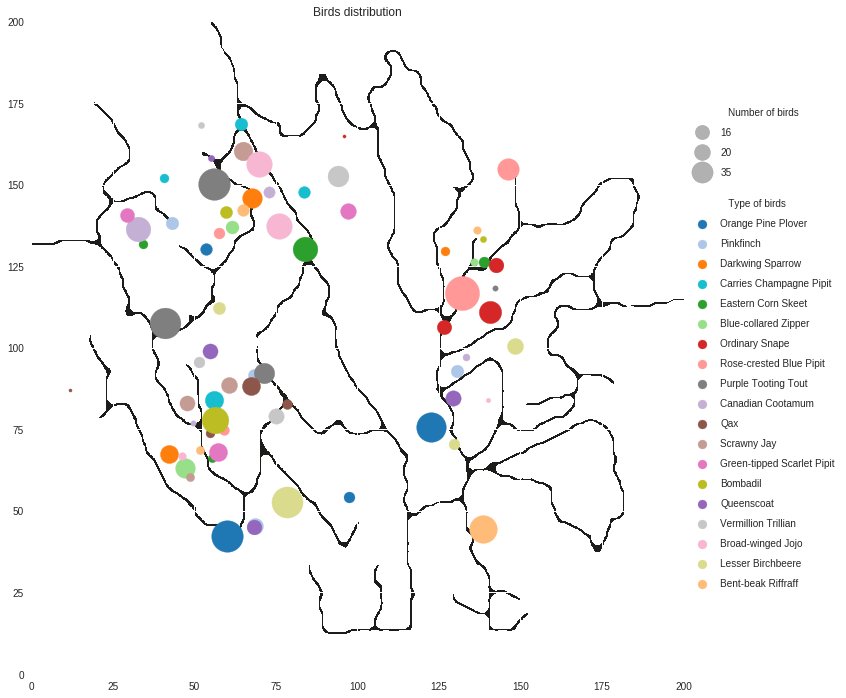

In [176]:
# let's try for different numbers of clusters 
# with n_cluster = 4 
process = color_map( process_cluster( df_useful , 4 ) )
plot_map(image_1 , process)

<div class="alert alert-success">
    <b>Step 4:</b>
     <ul>
      <li>Adding the 15 positions provided by Kasios and displaying the final map
    </li>
    </ul>
</div>

In [177]:
#Adding the 15 positions from the kasios file
df_2 = pd.read_csv('./Test Birds Location.csv')
df_useful_2 = df_2.copy()

In [182]:
# adding the plot of the new positions to original plot
def plot_map_complete(image , process , df_useful_2):

    plt.figure(figsize=(24,12))

    labels = list(set(process['English_name']))
    

    for k in range(process.shape[0]) : 
        df_loc = process.iloc[k , :]
        plt.scatter(df_loc['X'], df_loc['Y'], s= df_loc['number']*10, color=df_loc['color'],alpha = 1) 
    
    for area in [16, 20, 35]:
        plt.scatter([], [], c='k', alpha=0.3, s=area*13,
                  label=str(area)  )
    plt.scatter([],[], color='white', alpha=1, s=40, label = ' \n   Type of birds')
    legend1= plt.legend(loc='best', scatterpoints=1, frameon=False, labelspacing=1, title='')

    df_loc_col = process['color'].unique()

    plt.scatter(df_useful_2[' X'], df_useful_2[' Y'], s= 100, color='black', marker = "X" , alpha = 0.9 , label ='kasios birds')
    
    for k in range(len(labels)):
        df_loc = process.iloc[k , :]
        plt.scatter([], [], color=df_loc_col[k], alpha=1, s=80,
                   label=str(labels[k]) )
    plt.legend( loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, frameon=False, labelspacing=1, title='Number of birds')    
    
    
    plt.title('Birds distribution');


    extent= (0,200,0,200)

    imgplot = plt.imshow(image, extent= [0,200,0,200])



In [183]:
#The final visualisation is the following

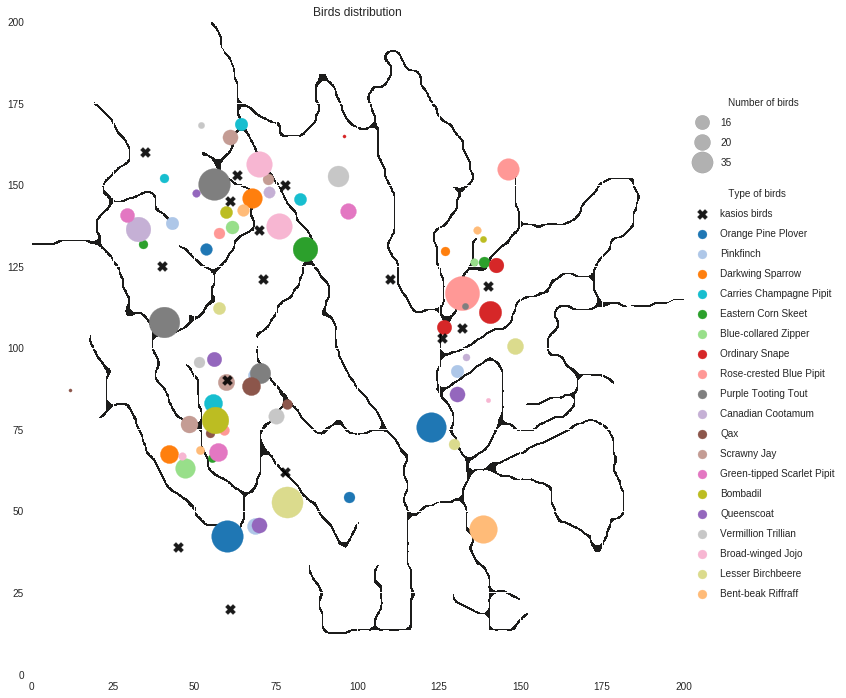

In [184]:
# with n_cluster = 4
process = color_map( process_cluster( df_useful , 4) )
plot_map_complete(image_1 , process , df_useful_2)